In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
# First Model
# X = resources, probabilities (scale of 0-5 [D=0, 2,12 = 1, 3,11 = 2, 4,10 = 3, 5,9 = 4, 6,8 = 5])
# y = points

In [25]:
# CSV - modified to rename columns
data = pd.read_csv('resources/data_modified.csv')

# Remove un-needed columns
data = data.drop(columns=['gameNum','player','me','2','3','4','5','6','7','8','9','10','11','12',\
                          'production','tradeGain','robberCardsGain','totalGain','tradeLoss',\
                          'robberCardsLoss','tribute','totalLoss','totalAvailable',
                         '1_1_N','1_2_N','1_3_N','2_1_N','2_2_N','2_3_N'])

data



,points,win,1_1_P,1_1_R,1_2_P,1_2_R,1_3_P,1_3_R,2_1_P,2_1_R,2_2_P,2_2_R,2_3_P,2_3_R
0,5,0,5,L,2,C,2,C,4,L,3,W,2,O
1,9,0,4,W,5,O,3,W,3,L,4,S,2,O
2,10,1,4,S,5,S,1,W,5,O,3,S,2,C
3,5,0,5,O,4,L,2,L,3,L,5,L,3,S
4,10,1,5,W,4,O,3,O,5,W,3,L,0,2L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5,0,5,S,3,W,2,O,3,L,4,C,2,S
196,5,0,5,O,4,W,3,L,4,C,5,O,2,C
197,10,1,5,L,3,C,2,W,3,S,4,O,2,C
198,4,0,4,C,5,L,3,L,4,S,4,O,1,S


In [26]:
# Pandas dummies convert to categorical
data = pd.get_dummies(data)

# Create list of column names
columns = []
for ea in data.columns:
    columns.append(ea)
# Pop 0th
columns.pop(0)
data

,points,win,1_1_P,1_2_P,1_3_P,2_1_P,2_2_P,2_3_P,1_1_R_C,1_1_R_L,...,2_3_R_2S,2_3_R_2W,2_3_R_3G,2_3_R_B,2_3_R_C,2_3_R_D,2_3_R_L,2_3_R_O,2_3_R_S,2_3_R_W
0,5,0,5,2,2,4,3,2,0,1,...,0,0,0,0,0,0,0,1,0,0
1,9,0,4,5,3,3,4,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,10,1,4,5,1,5,3,2,0,0,...,0,0,0,0,1,0,0,0,0,0
3,5,0,5,4,2,3,5,3,0,0,...,0,0,0,0,0,0,0,0,1,0
4,10,1,5,4,3,5,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5,0,5,3,2,3,4,2,0,0,...,0,0,0,0,0,0,0,0,1,0
196,5,0,5,4,3,4,5,2,0,0,...,0,0,0,0,1,0,0,0,0,0
197,10,1,5,3,2,3,4,2,0,1,...,0,0,0,0,1,0,0,0,0,0
198,4,0,4,5,3,4,4,1,1,0,...,0,0,0,0,0,0,0,0,1,0


Classification Model Building: Support Vector Machine

In [27]:
# Assign X (data) and y (target)
X = data[columns]
y = data['win'].values.reshape(-1,1)
print(X.shape, y.shape)

# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

# from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data

# ### BEGIN SOLUTION
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)
# ### END SOLUTION

# # Transform the training and testing data using the X_scaler and y_scaler models

# ### BEGIN SOLUTION
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)
# ### END SOLUTION

# # Create a LinearRegression model and fit it to the scaled training data

# ### BEGIN SOLUTION
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train_scaled, y_train_scaled)
# ### END SOLUTION

# # Create a LinearRegression model and fit it to the scaled training data

# ### BEGIN SOLUTION
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train_scaled, y_train_scaled)
# ### END SOLUTION

# # Make predictions using a fitted model
# # Plot the difference between the model predicted values and actual y values, versus the model predicted values
# # Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

# ### BEGIN SOLUTION
# predictions = model.predict(X_test_scaled)
# model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")
# plt.show()
# ### END SOLUTION

(200, 51) (200, 1)


In [28]:

# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)


/Users/vineetsikriyahoo.com/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
                            

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [36]:
# # ### BEGIN SOLUTION
# predictions = model.predict(X_test)
# model.fit(X_train, y_train)
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()
# # plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
# plt.title("Residual Plot")
# plt.show()
# # ### END SOLUTION

Implementing Kernel SVM with Sklearn SVM module

In [30]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='poly',degree =8)
model.fit(X, y)

/Users/vineetsikriyahoo.com/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(degree=8, kernel='poly')

# making prediction
predictions = model.predict(X_test)



In [31]:
predictions = model.predict(X_test)



# Evaluate the Model 

In [32]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.93      0.97        15

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
style.use("ggplot")

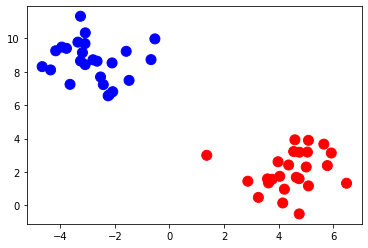

In [38]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [39]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

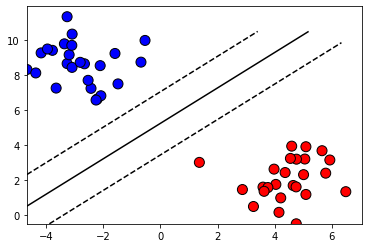

In [40]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [42]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.92      1.00      0.96        35
         red       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.90      0.92        50
weighted avg       0.94      0.94      0.94        50



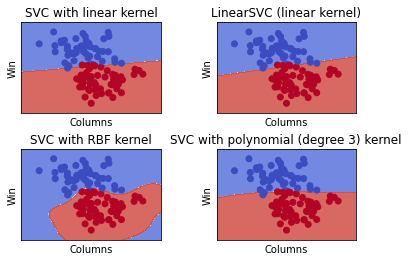

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features. We could
#                       # avoid this ugly slicing by using a two-dim dataset
# y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Columns')
    plt.ylabel('Win')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()